In [304]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import socket
from urllib3.connection import HTTPConnection
import nltk    #NLTK for description preprocessing
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [305]:
HTTPConnection.default_socket_options = (
    HTTPConnection.default_socket_options + [
        (socket.SOL_SOCKET, socket.SO_KEEPALIVE, 1),
        (socket.SOL_TCP, socket.TCP_KEEPIDLE, 45),
        (socket.SOL_TCP, socket.TCP_KEEPINTVL, 10),
        (socket.SOL_TCP, socket.TCP_KEEPCNT, 6)
    ] )

In [306]:
s = HTMLSession()

r = s.get('https://millercenter.org/the-presidency/presidential-speeches?field_president_target_id[8396]=8396')


soup= BeautifulSoup(r.text,'html.parser')


discursos = []
titulo= []
for speach in soup.find_all('div',class_='views-row') :
    link = speach.a.get('href')

    full_link = 'https://millercenter.org'+str(link)

    r_=s.get(full_link)
    
    soup_ =BeautifulSoup(r_.text,'html.parser')

    title = soup_.find('h2',class_='presidential-speeches--title').span.text
    
    titulo.append(title)

    full_discurso = soup_.find('div',class_= 'view-transcript')
    
    total = full_discurso.find_all('p')

    

    total = [elem.get_text() for elem in total]

    #taking out the list of list

    discursos.append(total)
    
    


In [307]:
res = [''.join(ele) for ele in discursos]

len(res)

12

In [308]:
len(discursos)

12

In [309]:
titulo

['January 19, 2021: Farewell Address',
 'January 13, 2021: Statement about the Violence at the Capitol',
 'January 7, 2021: Message After Pro-Trump Mob Overruns US Capitol',
 'January 6, 2021: Speech Urging Supporters to Go Home',
 'November 5, 2020: Remarks on the 2020 Election',
 'October 26, 2020: Swearing-In Ceremony of the Honorable Amy Coney Barrett to the US Supreme Court ',
 'September 26, 2020: Announcing His Nominee for the US Supreme Court',
 'September 7, 2020: Labor Day Press Conference',
 'August 8, 2020: Press Conference on Executive Orders',
 'July 4, 2020: Remarks at Salute to America',
 'June 20, 2020: Campaign Rally in Tulsa, Oklahoma',
 'June 13, 2020: Address at West Point Graduation']

In [310]:
fecha = [i.split(':')[0] for i in titulo]

discursos_titulo = [i.split(':')[1] for i in titulo]

In [311]:
fecha

['January 19, 2021',
 'January 13, 2021',
 'January 7, 2021',
 'January 6, 2021',
 'November 5, 2020',
 'October 26, 2020',
 'September 26, 2020',
 'September 7, 2020',
 'August 8, 2020',
 'July 4, 2020',
 'June 20, 2020',
 'June 13, 2020']

In [312]:
discursos_titulo

[' Farewell Address',
 ' Statement about the Violence at the Capitol',
 ' Message After Pro-Trump Mob Overruns US Capitol',
 ' Speech Urging Supporters to Go Home',
 ' Remarks on the 2020 Election',
 ' Swearing-In Ceremony of the Honorable Amy Coney Barrett to the US Supreme Court ',
 ' Announcing His Nominee for the US Supreme Court',
 ' Labor Day Press Conference',
 ' Press Conference on Executive Orders',
 ' Remarks at Salute to America',
 ' Campaign Rally in Tulsa, Oklahoma',
 ' Address at West Point Graduation']

In [313]:
df = pd.DataFrame({'titulo':discursos_titulo,'fecha':fecha,'discurso':res})

In [314]:
df

,titulo,fecha,discurso
0,Farewell Address,"January 19, 2021","My fellow Americans: Four years ago, we launch..."
1,Statement about the Violence at the Capitol,"January 13, 2021","My fellow Americans, I want to speak to you to..."
2,Message After Pro-Trump Mob Overruns US Capitol,"January 7, 2021",I would like to begin by addressing the heinou...
3,Speech Urging Supporters to Go Home,"January 6, 2021",I know your pain. I know your hurt.We had an e...
4,Remarks on the 2020 Election,"November 5, 2020",THE PRESIDENT: Good evening. I’d like to provi...
5,Swearing-In Ceremony of the Honorable Amy Con...,"October 26, 2020",THE PRESIDENT: Thank you very much. Appreci...
6,Announcing His Nominee for the US Supreme Court,"September 26, 2020",THE PRESIDENT: Thank you very much. Thank you....
7,Labor Day Press Conference,"September 7, 2020",THE PRESIDENT: Thank you very much. Thank you....
8,Press Conference on Executive Orders,"August 8, 2020","Thank you very much everybody. Thank you, and ..."
9,Remarks at Salute to America,"July 4, 2020",THE PRESIDENT: Wow. Are you having a good time...


In [315]:
df['discurso'] = df['discurso'].replace('THE PRESIDENT:',"",regex=True)


In [316]:
df

,titulo,fecha,discurso
0,Farewell Address,"January 19, 2021","My fellow Americans: Four years ago, we launch..."
1,Statement about the Violence at the Capitol,"January 13, 2021","My fellow Americans, I want to speak to you to..."
2,Message After Pro-Trump Mob Overruns US Capitol,"January 7, 2021",I would like to begin by addressing the heinou...
3,Speech Urging Supporters to Go Home,"January 6, 2021",I know your pain. I know your hurt.We had an e...
4,Remarks on the 2020 Election,"November 5, 2020",Good evening. I’d like to provide the America...
5,Swearing-In Ceremony of the Honorable Amy Con...,"October 26, 2020",Thank you very much. Appreciate it. Thank...
6,Announcing His Nominee for the US Supreme Court,"September 26, 2020",Thank you very much. Thank you. Thank you. I ...
7,Labor Day Press Conference,"September 7, 2020",Thank you very much. Thank you. Happy Labor D...
8,Press Conference on Executive Orders,"August 8, 2020","Thank you very much everybody. Thank you, and ..."
9,Remarks at Salute to America,"July 4, 2020",Wow. Are you having a good time? Members of C...


In [317]:
df['discurso'] = df['discurso'].astype(str).str.lower()

In [318]:
regexp = RegexpTokenizer('\w+') #tokenization with regular expression

df['discurso_tokenizado']=df['discurso'].apply(regexp.tokenize)

In [319]:
stopwords = nltk.corpus.stopwords.words('english')

new_stopwords = ['let','see','one','two','four','five','six','well','make','much','time','ago','want','thank','even','never','seen','greatest','applause','bless',
'every','tight','going','said','knit','lot','little','know','say','thing','many','actually','think','look','things','happen','talking','take',
'saying','lose','came']

stopwords.extend(new_stopwords)


In [320]:
df['discurso_tokenizado'] = df['discurso_tokenizado'].apply(lambda x: [item for item in x if item not in stopwords]) 



In [321]:
df['text_string'] = df['discurso_tokenizado'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [322]:
all_words = ' '.join([word for word in df['text_string']])

In [323]:
all_words = re.sub(r'\b(\w+\s*)\1{1,}', '\\1', all_words)

In [324]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

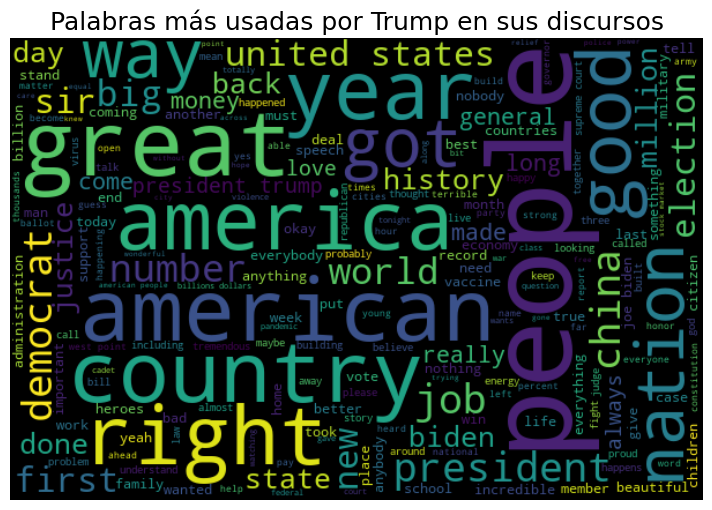

In [325]:
from wordcloud import WordCloud #Wordclud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2,
                    background_color='black',
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 6))
plt.title("Palabras más usadas por Trump en sus discursos",fontsize= 18)
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.savefig('wordcloud.jpg', bbox_inches='tight')
plt.show();

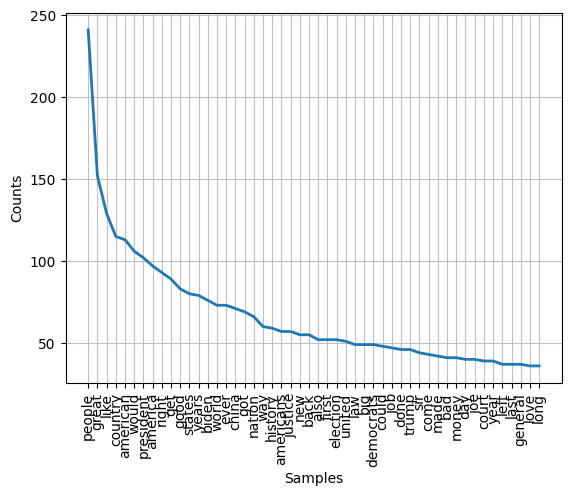

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [326]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
fdist.plot(50)

In [327]:
from nltk.util import ngrams

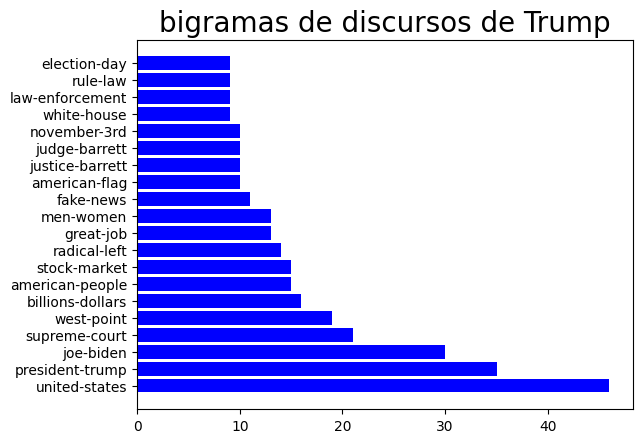

In [328]:
bigrams=ngrams(tokenized_words,2)

tokenized_bg = nltk.FreqDist(bigrams)

plot =tokenized_bg.most_common(20)

wrds = ['-'.join(x) for x, c in plot]

wdth = [c for x, c in plot]

plt.title('bigramas de discursos de Trump',fontsize=20)

plt.barh(wrds, wdth, color='blue')

plt.savefig('bigrams_trump.jpg',bbox_inches='tight')
plt.show()

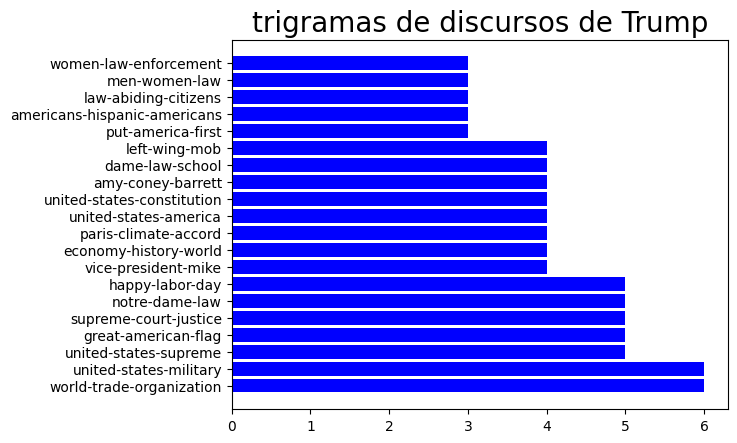

In [329]:
trigrams=ngrams(tokenized_words,3)

tokenized_tri = nltk.FreqDist(trigrams)

plot =tokenized_tri.most_common(22)

plot.remove((('states', 'supreme', 'court'), 5))
plot.remove((('president', 'mike', 'pence'), 4))

wrds = ['-'.join(x) for x, c in plot]




wdth = [c for x, c in plot]

plt.title('trigramas de discursos de Trump',fontsize=20)

plt.barh(wrds, wdth, color='blue')

plt.savefig('trigramas_trump.jpg',bbox_inches='tight')
plt.show()

In [330]:
plot

[(('world', 'trade', 'organization'), 6),
 (('united', 'states', 'military'), 6),
 (('united', 'states', 'supreme'), 5),
 (('great', 'american', 'flag'), 5),
 (('supreme', 'court', 'justice'), 5),
 (('notre', 'dame', 'law'), 5),
 (('happy', 'labor', 'day'), 5),
 (('vice', 'president', 'mike'), 4),
 (('economy', 'history', 'world'), 4),
 (('paris', 'climate', 'accord'), 4),
 (('united', 'states', 'america'), 4),
 (('united', 'states', 'constitution'), 4),
 (('amy', 'coney', 'barrett'), 4),
 (('dame', 'law', 'school'), 4),
 (('left', 'wing', 'mob'), 4),
 (('put', 'america', 'first'), 3),
 (('americans', 'hispanic', 'americans'), 3),
 (('law', 'abiding', 'citizens'), 3),
 (('men', 'women', 'law'), 3),
 (('women', 'law', 'enforcement'), 3)]